<a href="https://colab.research.google.com/github/Kajalm1995/Association-rule-mining/blob/main/Booking_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Booking Classification Binary with Keras

In [46]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train dataset

In [47]:
import pandas as pd
df = pd.read_csv('/content/train (3).csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### Perform basic data quality check

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [49]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [50]:
df.duplicated().sum()

0

### Seperate X and Y (booking_status)

In [51]:
df['booking_status'].value_counts()

0    25596
1    16504
Name: booking_status, dtype: int64

<Axes: >

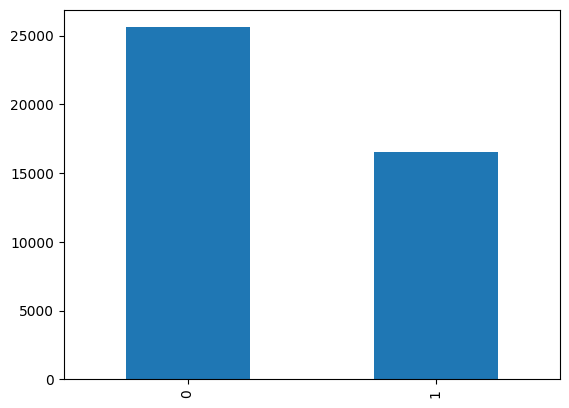

In [52]:
df['booking_status'].value_counts().plot(kind='bar')

In [53]:
X = df.drop(columns=['id', 'booking_status'])
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [54]:
Y = df[['booking_status']]
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


### Create a preprocesssing pipeline for X

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [56]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [57]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


### Train test split

In [58]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2,
                                                random_state=42)

In [59]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [60]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [61]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [62]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [63]:
xtrain.shape

(33680, 17)

In [64]:
xtest.shape

(8420, 17)

In [65]:
xtrain.shape[1]

17

### Build a keras neural network

In [66]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

### Summary of Activation function with Loss function

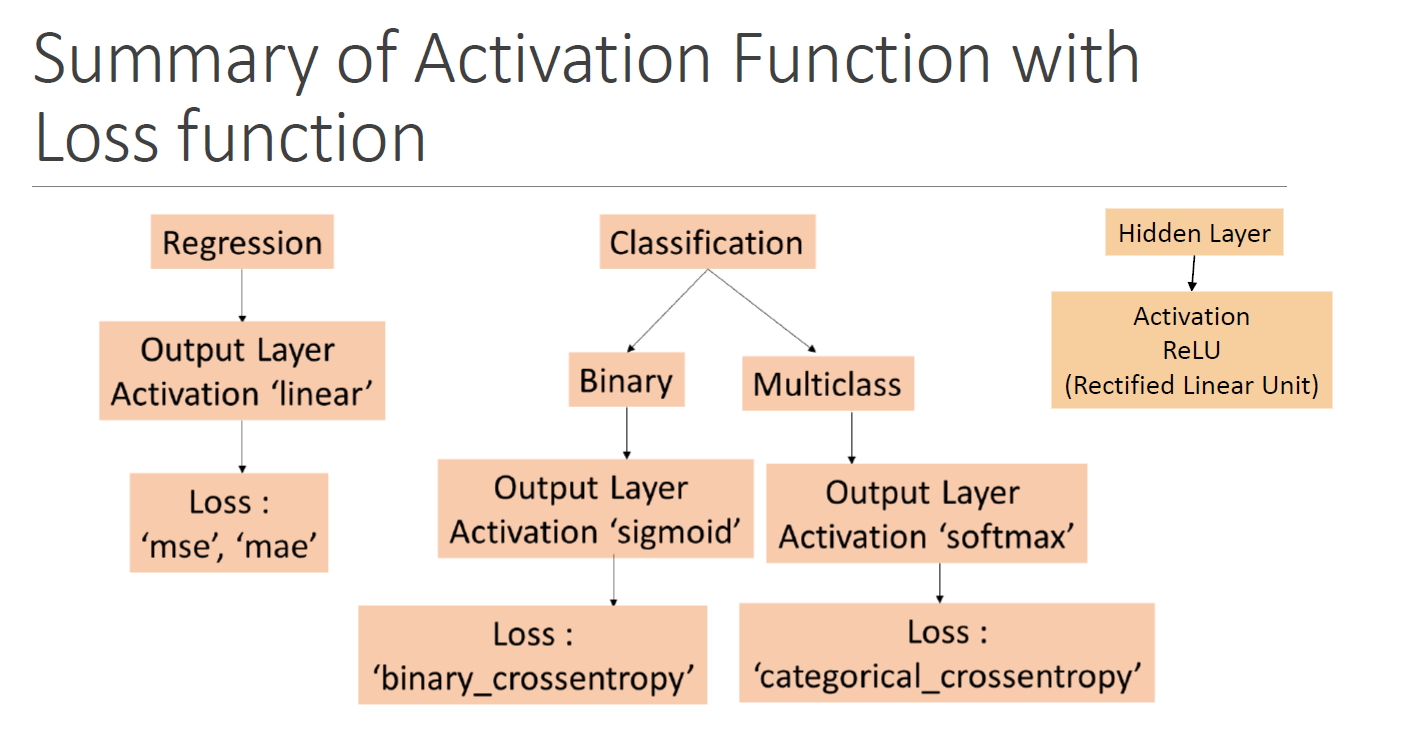

In [67]:
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add Hidden Layer 1
model.add(Dense(units=64, activation='relu'))
# Add Dropout layer 1
model.add(Dropout(rate=0.3))
# Add Hidden Layer 2
model.add(Dense(units=32, activation='relu'))
# Add Dropout Layer 2
model.add(Dropout(rate=0.2))
# Output layer
model.add(Dense(units=1, activation='sigmoid'))

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1152      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [69]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fitting the model

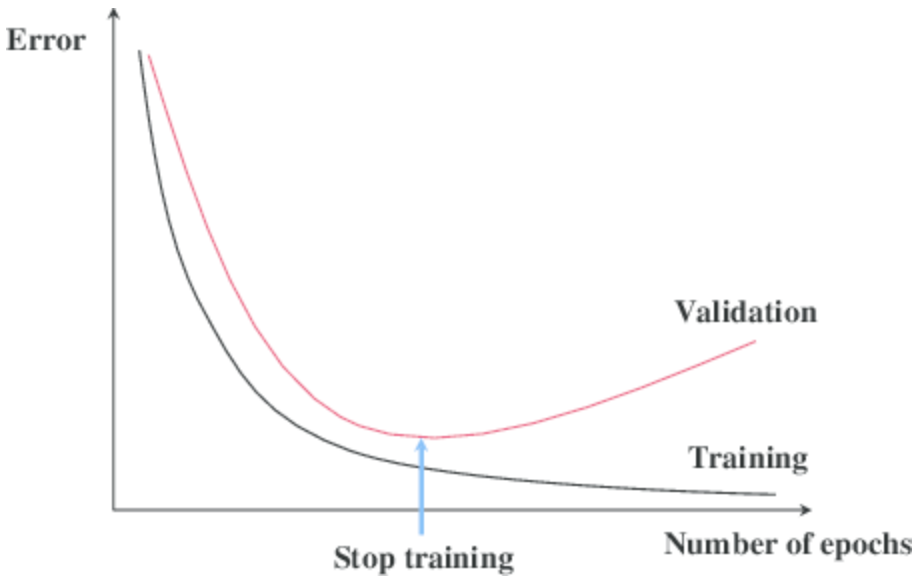

In [70]:
from keras.callbacks import EarlyStopping

In [71]:
es = EarlyStopping(monitor='val_loss', patience=10)

In [72]:
hist = model.fit(xtrain, ytrain, validation_split=0.2,
                 epochs=200, callbacks=[es])

Epoch 1/200
842/842 [==============================] - 4s 4ms/step - loss: 0.5152 - accuracy: 0.7437 - val_loss: 0.4777 - val_accuracy: 0.7726
Epoch 2/200
842/842 [==============================] - 4s 4ms/step - loss: 0.4796 - accuracy: 0.7729 - val_loss: 0.4728 - val_accuracy: 0.7758
Epoch 3/200
842/842 [==============================] - 3s 4ms/step - loss: 0.4700 - accuracy: 0.7791 - val_loss: 0.4654 - val_accuracy: 0.7862
Epoch 4/200
842/842 [==============================] - 3s 4ms/step - loss: 0.4657 - accuracy: 0.7825 - val_loss: 0.4625 - val_accuracy: 0.7853
Epoch 5/200
842/842 [==============================] - 4s 4ms/step - loss: 0.4634 - accuracy: 0.7845 - val_loss: 0.4614 - val_accuracy: 0.7896
Epoch 6/200
842/842 [==============================] - 3s 4ms/step - loss: 0.4601 - accuracy: 0.7867 - val_loss: 0.4603 - val_accuracy: 0.7885
Epoch 7/200
842/842 [==============================] - 3s 4ms/step - loss: 0.4584 - accuracy: 0.7897 - val_loss: 0.4580 - val_accuracy: 0.7908

### Check the learning curve for the neural net

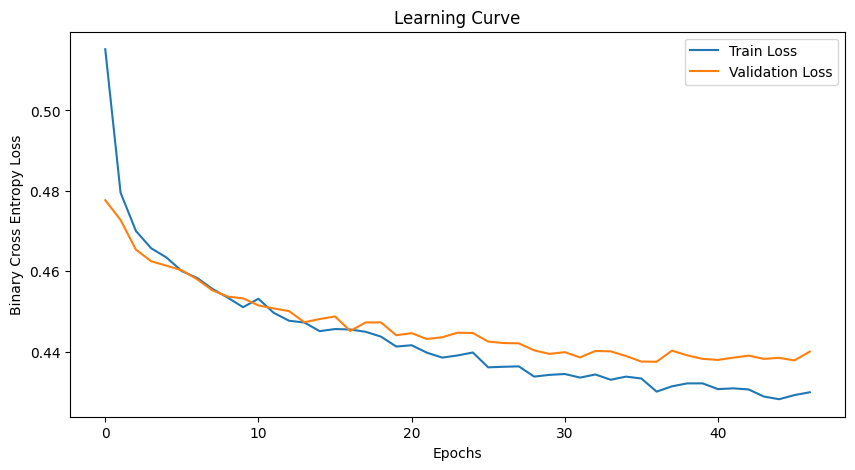

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate model in train and test

In [74]:
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 2s 2ms/step - loss: 0.4161 - accuracy: 0.8121


[0.41612184047698975, 0.8121436834335327]

In [75]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.8074


[0.425312340259552, 0.8073633909225464]

### Get the probability from neural network

In [76]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

264/264 [==============================] - 1s 3ms/step


In [77]:
yprob_tr[0:5]

array([[0.00371073],
       [0.23322244],
       [0.78077185],
       [0.7771603 ],
       [0.80443245]], dtype=float32)

In [78]:
yprob_ts[0:5]

array([[0.02012192],
       [0.88925815],
       [0.37671757],
       [0.01886968],
       [0.12639982]], dtype=float32)

### Get the predictions from probabilities

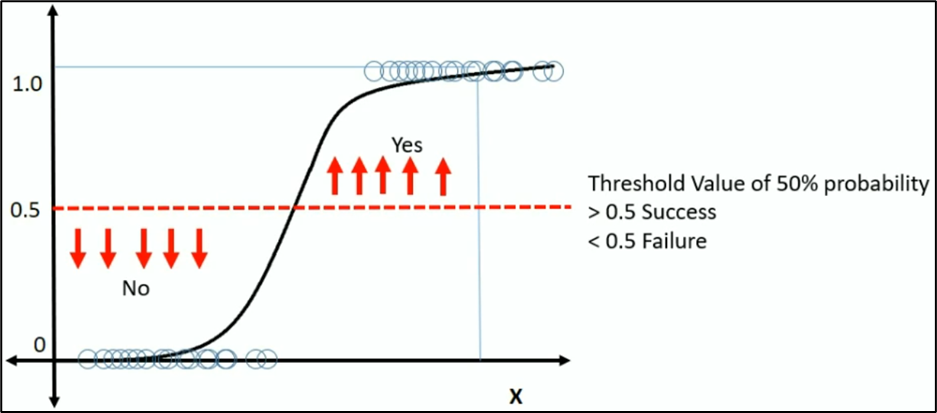

In [79]:
ypred_tr = [1 if prob>=0.5 else 0 for prob in yprob_tr]
ypred_ts = [1 if prob>=0.5 else 0 for prob in yprob_ts]

In [80]:
ypred_tr[0:5]

[0, 0, 1, 1, 1]

In [81]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [82]:
ypred_ts[0:5]

[0, 1, 0, 0, 0]

In [83]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


### Plot the confusion matrix for test

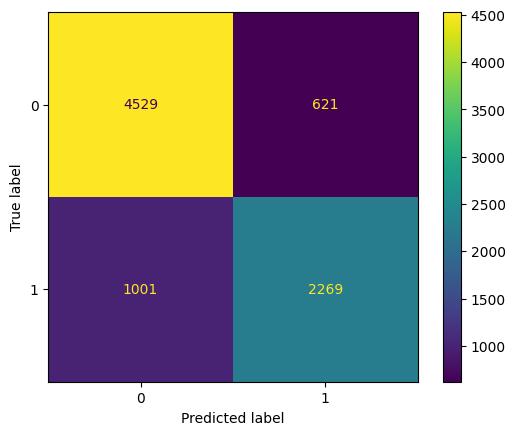

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print the classification report

In [85]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      5150
           1       0.79      0.69      0.74      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.79      8420
weighted avg       0.81      0.81      0.80      8420



### As model accuracy is around 80% this model is good for out of sample predictions

### Out of sample Predictions

In [88]:
xnew = pd.read_csv('/content/test (2).csv')
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [89]:
xnew2 = xnew.drop(columns=['id'])

### Apply pre.transform on xnew2

In [90]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


### Get the probablities for xnew

In [91]:
yprob = model.predict(xnew_pre)

878/878 [==============================] - 2s 3ms/step


In [92]:
yprob

array([[0.07212165],
       [0.02143276],
       [0.3247687 ],
       ...,
       [0.14687057],
       [0.44936585],
       [0.81318396]], dtype=float32)

### Get the predictions from probabilities

In [93]:
ypred = [1 if prob>=0.5 else 0 for prob in yprob]

In [94]:
ypred[0:5]

[0, 0, 0, 0, 1]

In [95]:
yprob[0:5]

array([[0.07212165],
       [0.02143276],
       [0.3247687 ],
       [0.13021466],
       [0.60765   ]], dtype=float32)

### Saving above results to dataframe and csv

In [96]:
df_final = xnew[['id']]
df_final

,id
0,42100
1,42101
2,42102
3,42103
4,42104
...,...
28063,70163
28064,70164
28065,70165
28066,70166


In [97]:
df_final['booking_status'] = ypred
df_final['Probability'] = yprob

In [98]:
df_final

,id,booking_status,Probability
0,42100,0,0.072122
1,42101,0,0.021433
2,42102,0,0.324769
3,42103,0,0.130215
4,42104,1,0.607650
...,...,...,...
28063,70163,1,0.945855
28064,70164,0,0.042009
28065,70165,0,0.146871
28066,70166,0,0.449366


In [99]:
df_final['booking_status'].value_counts()

0    18534
1     9534
Name: booking_status, dtype: int64

<Axes: >

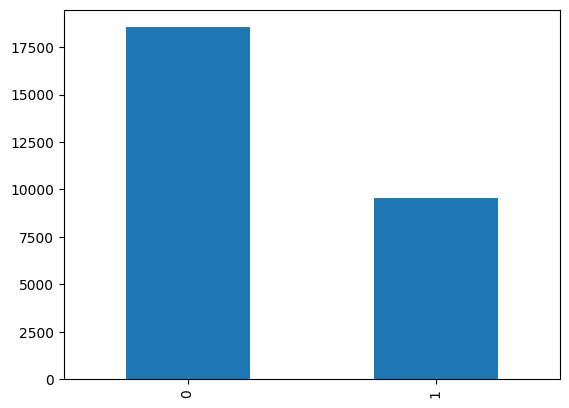

In [100]:
df_final['booking_status'].value_counts().plot(kind='bar')

In [101]:
df_final.to_csv('Results.csv', index=False)

### Save the neural network

In [102]:
model.save('BookingClassification.keras')

### Loading the model

In [103]:
from keras.models import load_model
nn = load_model('/content/BookingClassification.keras')
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1152      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
